In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#기온 데이터 읽어오기
df = pd.read_csv('temp10years.csv',encoding='utf-8')

df

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


In [3]:
df.head()

,연,월,일,기온,품질,균질
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1


In [18]:
train_year = (df["연"]<=2015)
test_year = (df["연"]>=2016)
interval = 6
df["연"]

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
4013    2016
4014    2016
4015    2016
4016    2016
4017    2016
Name: 연, Length: 4018, dtype: int64

In [5]:
#과거 6일간의 데이터를 기반으로 학습할 데이터 생성
def make_data(data):
    #학습데이터
    x = []
    #결과데이터
    y = []
    temps=list(data["기온"])
    
    for i in range(len(temps)):
        if i<interval: continue
        y.append(temps[i])
        xa=[]
        for p in range(interval):
            d=i+p-interval
            xa.append(temps[d])
        x.append(xa)
    
    return (x,y)

In [6]:
#train, test data 준비
x_train,y_train = make_data(df[train_year]) #2006_2015
x_test,y_test = make_data(df[test_year]) #2016

In [7]:
#Linear Regression Algorithm
model = LinearRegression(normalize=True)
#학습하기
model.fit(x_train,y_train)
#검증하기
y_predict = model.predict(x_test)

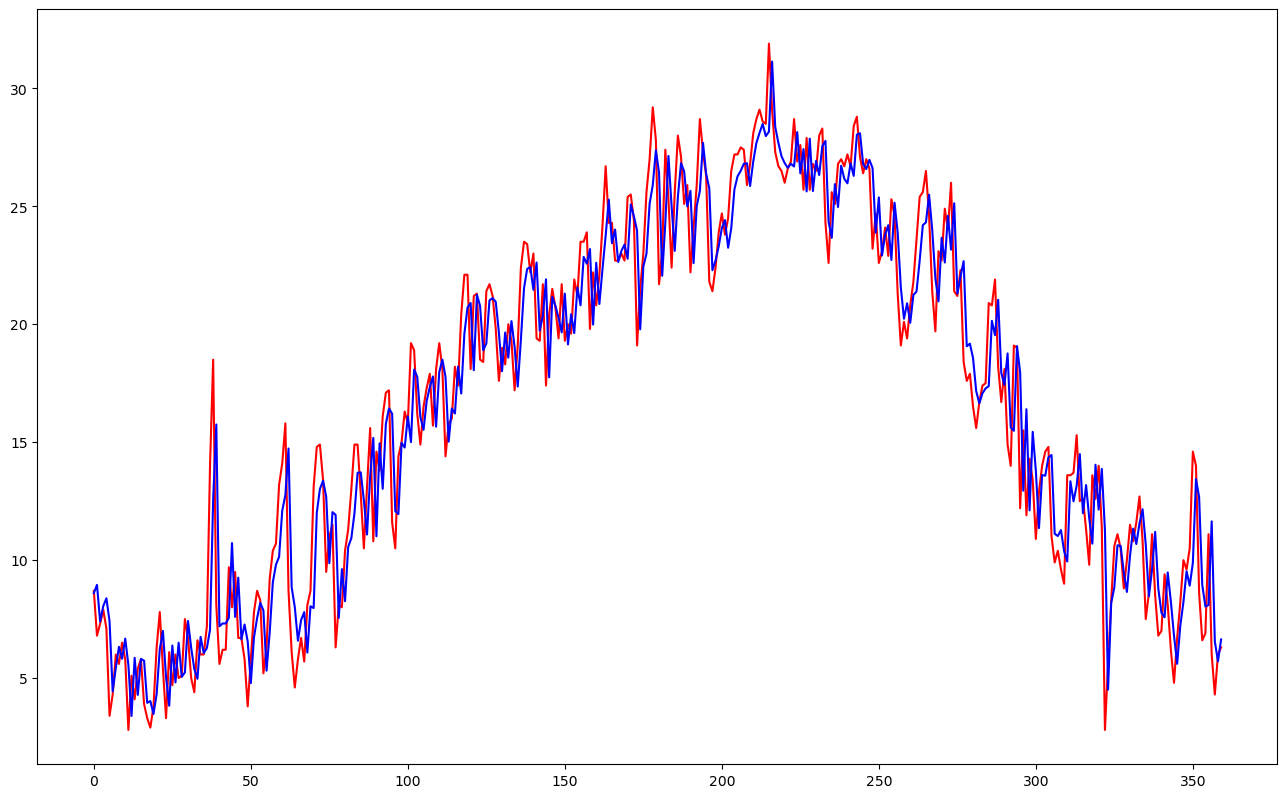

In [10]:
#결과를 그래프로 표시
plt.figure(figsize=(16,10),dpi=100)
plt.plot(y_test,c='r')
plt.plot(y_predict,c='b')
plt.savefig('weather-temp.png')
plt.show()

In [9]:
#오차 출력
print(y_predict-y_test)
diff_y = abs(y_predict-y_test)
print('평균=',sum(diff_y)/len(diff_y))
print('최대 오차=',max(diff_y))

[-0.10002007  2.15225572  0.10256015  0.15142234  1.28187488  4.01365434
  0.13671099 -0.56975101  0.72603441 -0.68140458  0.87244611  2.7607466
 -1.70903185  1.75737089 -1.11231561  0.01187698  1.83773828  0.65039859
  1.12591734 -0.32619115 -1.97861532 -1.57885621  1.59928286  1.72686513
 -2.27163088  1.68023609 -1.18539052  1.50001243 -0.05121848 -2.25973761
  0.72214703  1.27944462  0.98314343 -1.63017942  0.74598537  0.06470342
 -0.92896962 -6.94975005 -5.93966138  7.65213866  1.595504    1.11502761
  1.11392207 -2.14812766  2.7258388  -1.9074255   2.55773688 -0.06004565
  1.47215308  2.75437918 -1.01277685 -1.07156242 -1.15714278 -0.1103171
  2.66758147 -0.98676704 -2.27801803 -1.34517563 -0.89701271 -3.05874001
 -2.0044005  -3.03635208  6.03314611  2.75256234  3.40484054  0.78378786
  0.7571854   2.09606982 -2.02017163 -0.6575501  -5.12999152 -2.79552762
 -1.885336   -0.03289231  3.19409118 -1.127126    0.53537591  5.61959708
 -0.54903535  1.61963203 -2.1418707  -0.73748246 -2.0

In [12]:
x_train

[[3.6, 4.0, 3.7, 4.0, 3.6, 2.1],
 [4.0, 3.7, 4.0, 3.6, 2.1, 2.8],
 [3.7, 4.0, 3.6, 2.1, 2.8, 4.2],
 [4.0, 3.6, 2.1, 2.8, 4.2, 3.7],
 [3.6, 2.1, 2.8, 4.2, 3.7, 4.3],
 [2.1, 2.8, 4.2, 3.7, 4.3, 6.1],
 [2.8, 4.2, 3.7, 4.3, 6.1, 6.1],
 [4.2, 3.7, 4.3, 6.1, 6.1, 4.0],
 [3.7, 4.3, 6.1, 6.1, 4.0, 6.6],
 [4.3, 6.1, 6.1, 4.0, 6.6, 10.7],
 [6.1, 6.1, 4.0, 6.6, 10.7, 9.0],
 [6.1, 4.0, 6.6, 10.7, 9.0, 8.0],
 [4.0, 6.6, 10.7, 9.0, 8.0, 5.6],
 [6.6, 10.7, 9.0, 8.0, 5.6, 4.2],
 [10.7, 9.0, 8.0, 5.6, 4.2, 4.0],
 [9.0, 8.0, 5.6, 4.2, 4.0, 1.3],
 [8.0, 5.6, 4.2, 4.0, 1.3, 3.1],
 [5.6, 4.2, 4.0, 1.3, 3.1, 2.5],
 [4.2, 4.0, 1.3, 3.1, 2.5, 4.4],
 [4.0, 1.3, 3.1, 2.5, 4.4, 5.5],
 [1.3, 3.1, 2.5, 4.4, 5.5, 6.0],
 [3.1, 2.5, 4.4, 5.5, 6.0, 6.8],
 [2.5, 4.4, 5.5, 6.0, 6.8, 5.5],
 [4.4, 5.5, 6.0, 6.8, 5.5, 6.0],
 [5.5, 6.0, 6.8, 5.5, 6.0, 8.4],
 [6.0, 6.8, 5.5, 6.0, 8.4, 7.1],
 [6.8, 5.5, 6.0, 8.4, 7.1, 5.7],
 [5.5, 6.0, 8.4, 7.1, 5.7, 7.8],
 [6.0, 8.4, 7.1, 5.7, 7.8, 6.0],
 [8.4, 7.1, 5.7, 7.8, 6.0, 1.6],
 [7.